In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
import os
from IPython.display import HTML, display
from PIL import Image


In [2]:

# ==== 1. Przygotowanie środowiska i współczynniki gamma ====
env_id = "Swimmer-v5"
gamma_values = [0.8, 0.9, 0.99]
all_rewards = {}

for gamma in gamma_values:
    print(f"\n=== Trening dla gamma = {gamma} ===")
    env = make_vec_env(env_id, n_envs=1, seed=0)

    model = PPO(
        "MlpPolicy",
        env,
        learning_rate=3e-4,
        n_steps=2048,
        batch_size=64,
        n_epochs=10,
        gamma=gamma,
        gae_lambda=0.95,
        clip_range=0.2,
        ent_coef=0.0,
        verbose=0
    )

    rewards = []
    episodes = 30
    steps_per_episode = 5000

    for i in range(episodes):
        model.learn(total_timesteps=steps_per_episode, reset_num_timesteps=False)
        mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=5, render=False)
        rewards.append(mean_reward)
        print(f"Gamma {gamma} | Epizod {i+1}/{episodes} | Średnia nagroda: {mean_reward:.2f}")

    all_rewards[gamma] = rewards
    model.save(f"ppo_swimmer_gamma_{gamma}")


=== Trening dla gamma = 0.8 ===
Gamma 0.8 | Epizod 1/30 | Średnia nagroda: 35.93
Gamma 0.8 | Epizod 2/30 | Średnia nagroda: 42.01
Gamma 0.8 | Epizod 3/30 | Średnia nagroda: 44.52
Gamma 0.8 | Epizod 4/30 | Średnia nagroda: 43.28
Gamma 0.8 | Epizod 5/30 | Średnia nagroda: 42.79
Gamma 0.8 | Epizod 6/30 | Średnia nagroda: 45.04
Gamma 0.8 | Epizod 7/30 | Średnia nagroda: 45.22
Gamma 0.8 | Epizod 8/30 | Średnia nagroda: 46.66
Gamma 0.8 | Epizod 9/30 | Średnia nagroda: 47.24
Gamma 0.8 | Epizod 10/30 | Średnia nagroda: 46.31
Gamma 0.8 | Epizod 11/30 | Średnia nagroda: 46.94
Gamma 0.8 | Epizod 12/30 | Średnia nagroda: 49.03
Gamma 0.8 | Epizod 13/30 | Średnia nagroda: 47.34
Gamma 0.8 | Epizod 14/30 | Średnia nagroda: 47.32
Gamma 0.8 | Epizod 15/30 | Średnia nagroda: 47.92
Gamma 0.8 | Epizod 16/30 | Średnia nagroda: 46.77
Gamma 0.8 | Epizod 17/30 | Średnia nagroda: 47.33
Gamma 0.8 | Epizod 18/30 | Średnia nagroda: 48.70
Gamma 0.8 | Epizod 19/30 | Średnia nagroda: 47.56
Gamma 0.8 | Epizod 20/30 |

/var/folders/1m/0h0qj6kd7gb_qzlllmbbrcw40000gn/T/ipykernel_8419/1198323986.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/1m/0h0qj6kd7gb_qzlllmbbrcw40000gn/T/ipykernel_8419/1198323986.py:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig("gamma_comparison.png")
/Users/aleksandraignacyk/Studia/semestr6/AI/AI/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


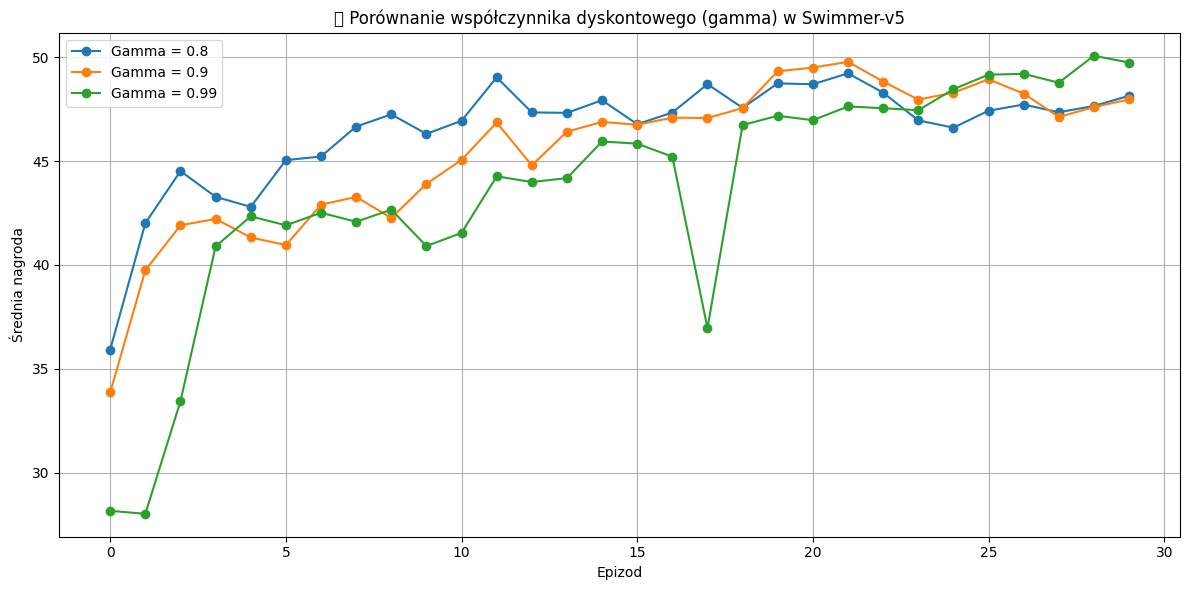

In [3]:
# ==== 2. Wykres porównujący różne gamma ====
plt.figure(figsize=(12, 6))
for gamma, rewards in all_rewards.items():
    plt.plot(rewards, label=f"Gamma = {gamma}", marker='o')

plt.xlabel("Epizod")
plt.ylabel("Średnia nagroda")
plt.title("📊 Porównanie współczynnika dyskontowego (gamma) w Swimmer-v5")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("gamma_comparison.png")
plt.show()



In [4]:
# ==== 3. Testowanie agenta z gamma=0.9 i tworzenie gifa ====
model = PPO.load("ppo_swimmer_gamma_0.9")
env_test = gym.make(env_id, render_mode="rgb_array")
obs, _ = env_test.reset()

frames = []
max_steps = 500
for step in range(max_steps):
    frame = env_test.render()
    frames.append(Image.fromarray(frame))
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env_test.step(action)
    if done or truncated:
        break

env_test.close()

gif_path = "ppo_swimmer_gamma_0.9.gif"
frames[::2][0].save(gif_path, save_all=True, append_images=frames[::2][1:], loop=0, duration=40)

display(HTML(f"<h4>🎬 Agent PPO z gamma=0.9 w Swimmer-v5</h4><img src='{gif_path}' width='600'/>"))


2025-04-10 21:17:52.595 Python[8419:28344609] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.
